# Machine Learning Project- EarthQuake Prediction System

https://www.kaggle.com/c/LANL-Earthquake-Prediction/overview

In [295]:
import pandas as pd
import numpy as np

In [296]:
#data = pd.read_csv("D:/LANL-Earthquake-Prediction/train.csv",nrows=50000)

In [297]:

data = pd.read_csv("D:/LANL-Earthquake-Prediction/train.csv",nrows=50000, dtype={'acoustic_data': np.int16, 'time_to_failure': np.float64})


In [298]:
data[:100]

,acoustic_data,time_to_failure
0,12,1.4691
1,6,1.4691
2,8,1.4691
3,5,1.4691
4,8,1.4691
5,8,1.4691
6,9,1.4691
7,7,1.4691
8,-5,1.4691
9,3,1.4691


In [299]:
data.describe()

,acoustic_data,time_to_failure
count,50000.000000,50000.000000
mean,4.962100,1.463164
std,6.488552,0.003745
min,-98.000000,1.456399
25%,2.000000,1.459599
50%,5.000000,1.462800
75%,8.000000,1.465900
max,104.000000,1.469100


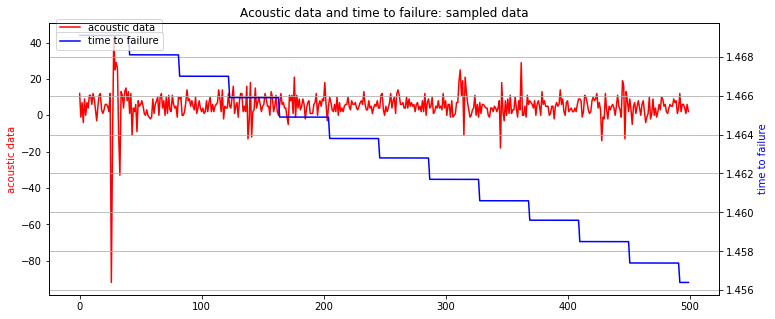

In [315]:

#visualize of samples data, first 100 datapoints
train_ad_sample_df = data['acoustic_data'].values[::100]
train_ttf_sample_df = data['time_to_failure'].values[::100]
# print(train_ad_sample_df)
#function for plotting based on both features
def plot_acc_ttf_data(train_ad_sample_df, train_ttf_sample_df, title="Acoustic data and time to failure: sampled data"):
    fig, ax1 = plt.subplots(figsize=(12, 5))
    plt.title(title)
    plt.plot(train_ad_sample_df, color='r')
    ax1.set_ylabel('acoustic data', color='r')
    plt.legend(['acoustic data '], loc=(0.01, 0.95))
    ax2 = ax1.twinx()
    plt.plot(train_ttf_sample_df, color='b')
    ax2.set_ylabel('time to failure', color='b')
    plt.legend(['time to failure'], loc=(0.01, 0.9))
    plt.grid(True)

plot_acc_ttf_data(train_ad_sample_df, train_ttf_sample_df)
del train_ad_sample_df
del train_ttf_sample_df

In [301]:
X = data['acoustic_data']
Y = data['time_to_failure']

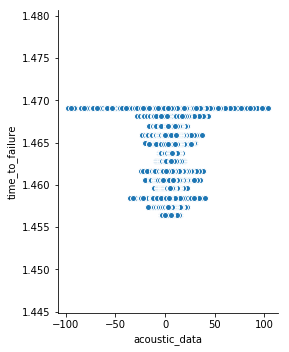

In [302]:
import seaborn as sns
%matplotlib inline
sns.pairplot(data,x_vars=['acoustic_data'],y_vars='time_to_failure',size=5,aspect=0.8,kind='scatter')

In [303]:
import sklearn
from sklearn.cross_validation import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size = 0.7,random_state=100)

In [304]:
X_train.head()

48824     9
2704     82
25631    -1
7285     13
27346    10
Name: acoustic_data, dtype: int16

In [305]:
X_train = X_train[:,np.newaxis]
X_test = X_test[:,np.newaxis]

## Model 1

## Performing Linear Regression

In statistics, linear regression is a linear approach to modeling the relationship between a scalar response (or dependent variable) and one or more explanatory variables (or independent variables). The case of one explanatory variable is called simple linear regression. For more than one explanatory variable, the process is called multiple linear regression. This term is distinct from multivariate linear regression, where multiple correlated dependent variables are predicted, rather than a single scalar variable. https://en.wikipedia.org/wiki/Linear_regression

In [238]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### cofficient calculation

In [239]:
print("Intercept of linear regression model is: ",lr.intercept_)
print("Slope of linear regression model is: ",lr.coef_)

Intercept of linear regression model is:  1.46310051321
Slope of linear regression model is:  [  1.29229634e-05]


#### Prediction 

In [240]:
Y_pred = lr.predict(X_test)

In [241]:
from sklearn.metrics import mean_squared_error,r2_score

In [242]:
mse = mean_squared_error(Y_test,Y_pred)

In [243]:
r_squared = r2_score(Y_test,Y_pred)

In [285]:
print("Mean Squared Error ",mse)

Mean Squared Error  1.40594778132e-05


In [286]:
print("Mean Rsqurared Error ",r_squared)

Mean Rsqurared Error  -0.000573552563472


#### Actual Vs Predicted Value

In [246]:
import matplotlib.pyplot as plt

Text(0,0.5,'time to failure')

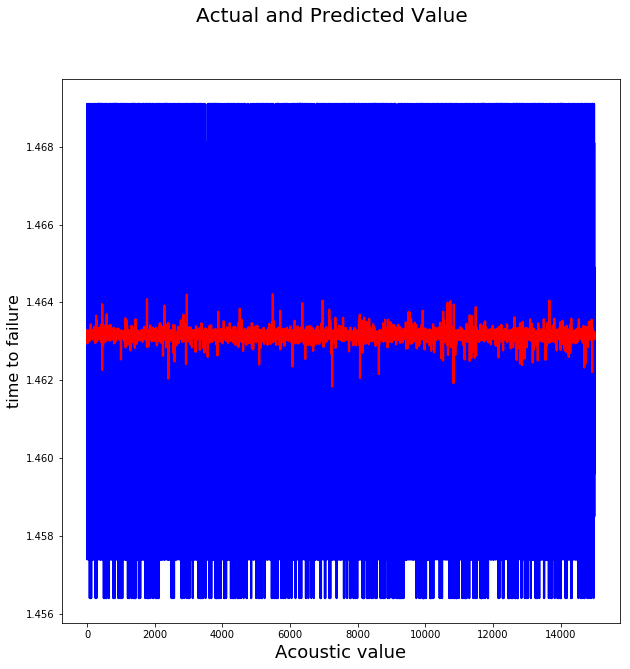

In [248]:
c = [i for i in range(1,15001,1)]
fig = plt.figure(figsize=(10,10))
plt.plot(c,Y_test,color="blue",linewidth=2.25,linestyle="-")
plt.plot(c,Y_pred,color="red",linewidth=2.25,linestyle="-")
fig.suptitle("Actual and Predicted Value", fontsize=20)
plt.xlabel("Acoustic value",fontsize=18)
plt.ylabel("time to failure",fontsize=16)


Text(0,0.5,'Predicted Y')

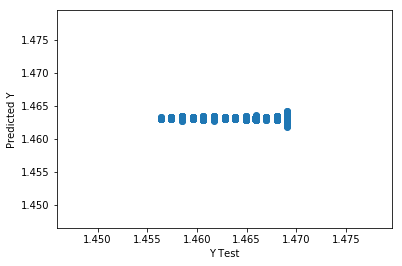

In [249]:
import matplotlib.pyplot as plt
plt.scatter(Y_test,Y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

## Gradient Descent 

Gradient Descent
Gradient descent is an optimization algorithm used to minimize some function by iteratively moving in the direction of steepest descent as defined by the negative of the gradient. In machine learning, we use gradient descent to update the parameters of our model. Parameters refer to coefficients in Linear Regression and weights in neural networks.

In [287]:
# Implement gradient descent function
# Takes in X, y, current m and c (both initialised to 0), num_iterations, learning rate
# returns gradient at current m and c for each pair of m and c

def gradient(X, y, m_current=0, c_current=0, iters=1000, learning_rate=0.01):
    N = float(len(y))
    gd_df = pd.DataFrame( columns = ['m_current', 'c_current','cost'])
    for i in range(iters):
        y_current = (m_current * X) + c_current
        cost = sum([data**2 for data in (y-y_current)]) / N
        m_gradient = -(2/N) * sum(X * (y - y_current))
        c_gradient = -(2/N) * sum(y - y_current)
        m_current = m_current - (learning_rate * m_gradient)
        c_current = c_current - (learning_rate * c_gradient)
        gd_df.loc[i] = [m_current,c_current,cost]
    return(gd_df)


In [288]:
# print gradients at multiple (m, c) pairs
# notice that gradient decreased gradually towards 0
# we have used 1000 iterations, can use more if needed
gradients = gradient(X,Y)
gradients

,m_current,c_current,cost
0,0.145215,0.029263,2.140863
1,0.093742,0.043530,1.396533
2,0.109542,0.062619,1.280931
3,0.102363,0.079759,1.239541
4,0.103063,0.097269,1.207522
5,0.101091,0.114358,1.177276
6,0.100055,0.131302,1.147898
7,0.098720,0.148009,1.119267
8,0.097508,0.164515,1.091351
9,0.096275,0.180811,1.064131


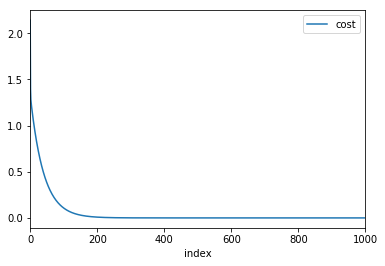

In [289]:
# plotting cost against num_iterations
gradients.reset_index().plot.line(x='index', y=['cost'])